![Astrofisica Computacional](../../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---

# Ejercicio 03. Ecuaciones Diferenciales Ordinarias I

## B4. Orbita de Plutón


Las ecuaciones para el movimeinto de Plutón alrededor del Sol son

\begin{equation}
    \frac{d^2 \textbf{r}}{dt^2} = - GM \frac{\textbf{r}}{r^3}
\end{equation}

donde $G$ es la constante gravitacional de Newton y $M$ es la masa del Sol. 

1. Utilice el programa que escribió para verificar si puede describir el movimiento del planeta enano Plutón. Este objeto tiene una orbita mucho mas excentrica que la orbita terrestre, con una distancia al Sol en el perihelio de $4.4368 \times 10^{12} \text{ m}$ y una velocidad lineal en este punto de $6.1218 \times 10^3 \text{ m/s}$.

---
**Solución**

El algoritmo velocidad-Verlet fue implementado para los ejercicios 1., 2. y 3. Como es usual en este tipo de problemas, utilizaremos un sistema de unidades con:

- unidad de masa: masa Solar $[M_{\odot }]$
- unidad distancia: Unidad Astronómica [au]
- unidad de tiempo: años [yr]

Utilizando este sistema de unidades, la constante gravitacional de Newton tendrá un valor de $G = 4\pi^2$,

De esta forma, implementaremos ua función llamada `f` que retornará el lado derecho de las ecuaciones diferenciales de movimiento y una función denominada `conserv_quant` que calculas las cantidades conservadas del problema (energía y momento angular).

In [1]:
import numpy as np

# Newtonian Gravitational Constant
G = 4.*np.pi**2
M = 1.

def f(t0, q0):
    '''
    ------------------------------------------
    f(t0, q0) 
    ------------------------------------------
    ODEs system for the motion of a test 
    particle around the Sun using cartesian 
    coordinates in the orbital plane.
    ------------------------------------------
    Arguments:
    t0: initial time
    q0: numpy array with the initial condition
        data:
        q0[0] = x
        q0[1] = y
        q0[2] = dx/dt
        q0[3] = dy/dt
    ------------------------------------------
    Dependeces: NumPy
    ------------------------------------------
    '''
    f = np.zeros(4)
    f[0] = q0[2]
    f[1] = q0[3]
    f[2] = - G*M*q0[0]/(q0[0]**2 + q0[1]**2)**(3/2)
    f[3] = - G*M*q0[1]/(q0[0]**2 + q0[1]**2)**(3/2)
    return f

def conserv_quant(q):
    '''
    ------------------------------------------
    conserv_quant(q)
    ------------------------------------------
    Evaluates the total energy and the total 
    angular momentum for the system 
    ------------------------------------------
    Arguments:
    q: NumPy array with the state of the 
       system in the format
       q = [t, x, y, vx, vy]
    ------------------------------------------
    Returns:
    E : Total Energy
    L : Total Angular Momentum
    ------------------------------------------
    Dependeces: NumPy
    ------------------------------------------
    '''
    CQ = np.zeros([len(q),3])
    CQ[:,0] = q[:,0] 
    v2 = q[:,3]**2 + q[:,4]**2
    r = np.sqrt(q[:,1]**2 + q[:,2]**2)
    E = v2/2 - G*M/r
    L = q[:,1]*q[:,4] - q[:,2]*q[:,3]
    CQ[:,1] = E
    CQ[:,2] = L
    return CQ


**Condición Inicial**

Tomaremos $t=0$ en el perihelio. Allí la distancia entre los dos cuerpos es de $1.4710 \times 10^{11} \text{ m}$ y su velocidad lineal es de $3.0287 \times 10^4 \text{ m/s}$. De esta forma se tomará la siguiente condición incial:

\begin{equation}
        \begin{cases}
            x = &4.4368 \times 10^{12} \text{ m}\\
            y = &0 \text{ m}\\
            v^x = &0  \text{ m/s}\\
            v^y = &6.1218 \times 10^3 \text{ m/s}.
        \end{cases}
    \end{equation}
    
Transformamos esta información a las unidades establecidas arriba,

In [2]:
# Initial Conditions
x = 4.4368e12 # [m]
y = 0 # [m]
vx = 0 # [m/s]
vy = 6.1218e3 # [m/s]

# Conversion Factors
au2m = 1.496e11  # 1au in meters
yr2s = 3.154e7   # 1yr in seconds

# Transformation
x *= 1/au2m # [au]
y *= 1/au2m # [au]
vx *= yr2s/au2m # [au/yr]
vy *= yr2s/au2m # [au/yr]


x, vy

(29.657754010695186, 1.2906522192513368)

## Solución del sistema ODEs

Definiremos una malla temporal con intervalos constantes iniciando en $t_0 = 0$ hasta $t_f = 250$ años (el periodo orbital de Plutón es de aproximadamente 248 años) y utilizaremos el algoritmo velocidad-Verlet para resolver el sistema de ecuaciones diferenciales. Utilizaremos un tamaño de paso de $\Delta t = 1 \text{ day} = 0.00273973 \text{ yr} \approx 0.003 \text{ yr}$.

In [25]:
# Computation time
import time

# Velocity-Verlet Algorithm
def velVerlet(ODE, t0, q0, tf, dt):
    '''
    ------------------------------------------
    velVerlet(h, t0, q0)
    Velocity-Verlet method for solving 
    a system of ODEs.
    ------------------------------------------
    Arguments:
    ODE: function defining the system of ODEs
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    tf: independent parameter final value
    n: Stepsize for the integration
    ------------------------------------------
    Dependences: NumPy
    ------------------------------------------
    '''
    d = int(len(q0)/2) # Dimension of the system 
    n = int((tf - t0)/dt) # Number of steps
    # Initial condition
    q = np.zeros([n,2*d+1])
    q[0,0] = t0
    q[0,1:] = q0
        
    for i in range(1,n):
        q[i,0] = q[i-1,0] + dt
        v_half = q[i-1,d+1:] + ODE(q[i-1,0], q[i-1,1:])[d:]*dt/2
        q[i,1:d+1] = q[i-1,1:d+1] + v_half*dt
        q[i,d+1:] = v_half + ODE(q[i,0], q[i,1:])[d:]*dt/2
    return q


# Creation of the time grid (in years)
t0 = 0. # [yr]
tf = 250. # [yr]

# Constant stepsize
dt = 3e-3 # [yr] \approx 1 hour

# Initial Conditions
Q0 = np.array([x, y, vx, vy])

# Solving the System
start = time.time()
Q = velVerlet(f, t0, Q0, tf, dt)
conservedQuantities = conserv_quant(Q)
end = time.time()

print('El tiempo de computo fue:', end - start)

El tiempo de computo fue: 0.664686918258667


Visualizamos la coordenada x para contar un número total de 6 orbitas alrededor del Sol,

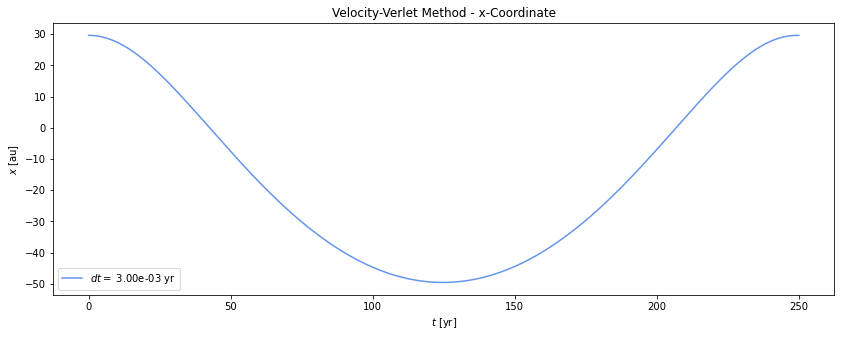

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(14,5))
ax.plot(Q[:,0], Q[:,1], color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax.set_title('Velocity-Verlet Method - x-Coordinate')
ax.set_xlabel(r'$t$ [yr]')
ax.set_ylabel(r'$x$ [au]')
ax.legend()

plt.show()

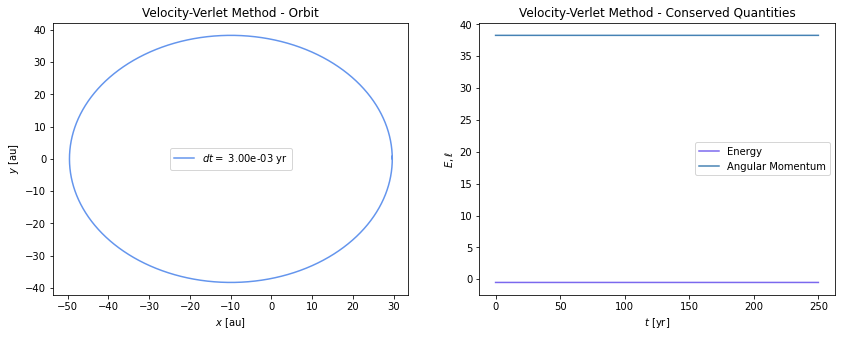

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(Q[:,1], Q[:,2], color='cornflowerblue', label=f'$dt=$ {dt:.2e} yr')
ax[0].set_title('Velocity-Verlet Method - Orbit')
ax[0].set_xlabel(r'$x$ [au]')
ax[0].set_ylabel(r'$y$ [au]')
ax[0].legend()

ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,1], color='mediumslateblue', label=f'Energy')
ax[1].plot(conservedQuantities[:,0], conservedQuantities[:,2], color='steelblue', label=f'Angular Momentum')
ax[1].set_title('Velocity-Verlet Method - Conserved Quantities')
ax[1].set_xlabel(r'$t$ [yr]')
ax[1].set_ylabel(r'$E, \ell$')
ax[1].legend()

plt.show()

EL cambio en las cantidades conservadas es mínimo:

In [28]:
print('El cambio en energía es :', np.abs(conservedQuantities[-1,1] - conservedQuantities[0,1]))
print('\nEl cambio en momento angular es :', np.abs(conservedQuantities[-1,2] - conservedQuantities[0,2]))

El cambio en energía es : 6.110667527536862e-13

El cambio en momento angular es : 5.755396159656812e-13


Sin embargo, al ver el detalle se comprueba que la energía tiene un interesante comportamiento:

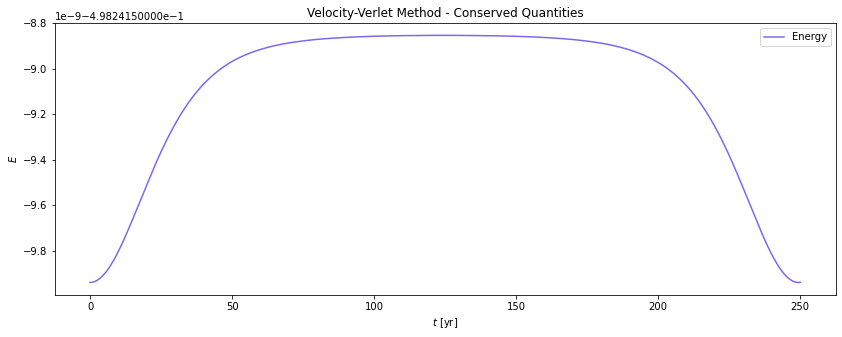

In [29]:
fig, ax = plt.subplots(figsize=(14,5))


ax.plot(conservedQuantities[:,0], conservedQuantities[:,1], color='mediumslateblue', label=f'Energy')
ax.set_title('Velocity-Verlet Method - Conserved Quantities')
ax.set_xlabel(r'$t$ [yr]')
ax.set_ylabel(r'$E$')
ax.legend()
plt.show()

In [30]:
print(f'Energía inicial: {conservedQuantities[0,1]:.7f}')

Energía inicial: -0.4982415


In [31]:
print(f'Energía promedio en los 250 años: {conservedQuantities[:,1].mean():.7f}')

Energía promedio en los 10 años: -0.4982415


El momento angular permanece practicamente igual en todo momento:

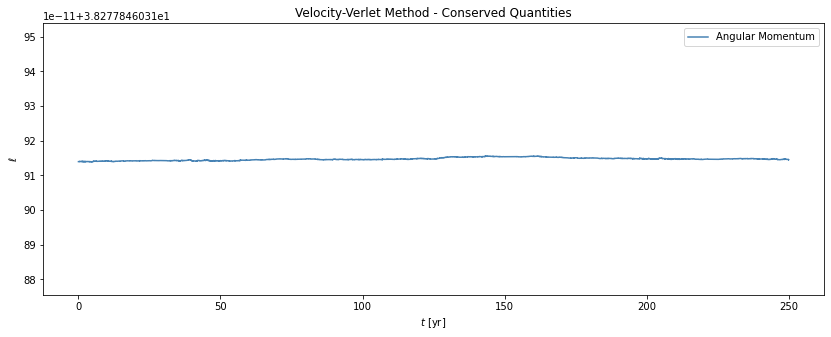

In [32]:
fig, ax = plt.subplots(figsize=(14,5))


ax.plot(conservedQuantities[:,0], conservedQuantities[:,2], color='steelblue', label=f'Angular Momentum')
ax.set_title('Velocity-Verlet Method - Conserved Quantities')
ax.set_xlabel(r'$t$ [yr]')
ax.set_ylabel(r'$\ell$')
ax.legend()
plt.show()